In [187]:
dut.disconnect()

Serial port disconnected.


In [ ]:
dut.ground_PIC()

In [634]:
dut.reset_chip()
dut.reset_dpe()

In [67]:
dut.power_off()

In [189]:
%reload_ext autoreload
%autoreload 2

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM6', 9600, timeout=1)
dut.connect(ser)


In [2]:
dut.power_on()

DAC initialized to a span from -5 V to 5 V


In [3]:
drv.gpio_pin_set('H', 1)

Calibrate all 12 ADCs on A0

In [129]:
ar=2
r=31
c=0

Vreads = np.arange(0, 0.5, 0.01)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
Vgates = [5]

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single(vread, Vgate, array=ar, row=r, col=c, gain=4) )
    volts_set.append(volts)

5.00-

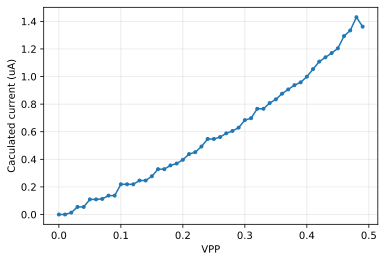

In [130]:
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

5.00-

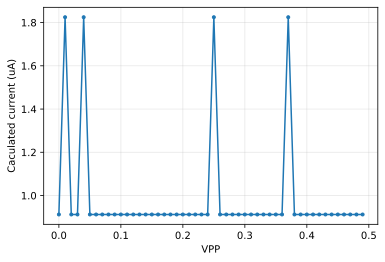

In [301]:
ar=2
r=0
c=61

Vreads = np.arange(0, 0.5, 0.01)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
# Vgates = [4, 3, 2, 1.5]
Vgates = [5]
Vref = 0.5

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_dpe_single_int(vread, Vgate, array=ar, row=r, col=c, gain=2, Vref = Vref) )
    volts_set.append(volts)
    
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

In [135]:
ar=2
r=31
c=0


Vread=0.1
Vgate=5

curr_list = []
# a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=2) * 1e6
for Tsh in range(100):
    curr_list.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=4, Tsh=Tsh) )

Text(0, 0.5, 'Current @ 0.2 V')

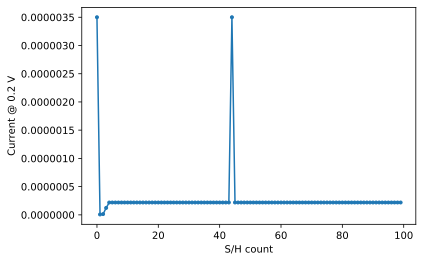

In [137]:
plt.plot(range(100), curr_list, '.-')
# plt.ylim(0,7e-5)
plt.xlabel('S/H count')
plt.ylabel('Current @ 0.2 V')
# for i in range(256):
#     print(f'{i} - {curr_list[i]}')

In [36]:
Vread=0.1
Vgate=5

curr_list = []
for Tsh in range(256):
    curr_list.append( a0.read_single(vread, Vgate, array=ar, row=r, col=c, gain=2) )

(0, 7e-05)

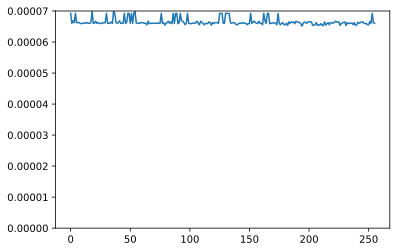

In [37]:
plt.plot(range(256), curr_list)
plt.ylim(0,7e-5)

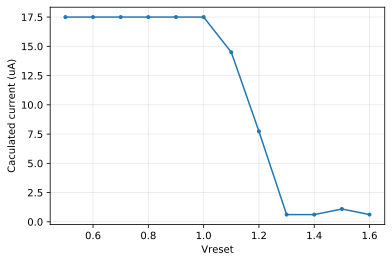

In [126]:
ar=2
r=8
c=4

Vreset = np.arange(0.5, 1.7, 0.1)
Vgate = 5
Vread = 0.2
volts = []
for Vr in Vreset:
    a0.reset_single_int(Vr, Vgate, array=ar, row=r, col=c)
    volts.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=3) )
    

plt.plot(Vreset, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('Vreset')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)
    

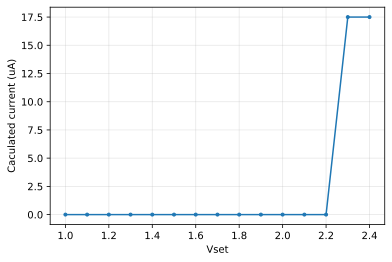

In [154]:
ar=2
r=46
c=25

Vset = np.arange(1, 2.5, 0.1)
Vgate = 1.5
Vread = 0.2
volts = []

for Vs in Vset:
    a0.set_single_int(Vs, Vgate, array=ar, row=r, col=c)
    volts.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=3) )
    

plt.plot(Vset, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('Vset')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)
    

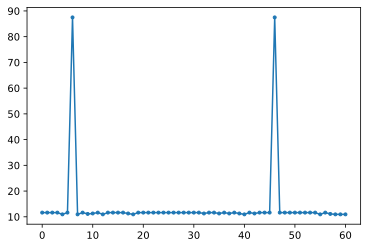

In [158]:
ar = 2
c = 25

Vread = 0.2
row = np.arange(0, 61, 1)
Vgate = 3
volts =[]

for r in row:
    volts.append( a0.read_dpe_single(Vread, Vgate, array=ar, row=r, col=c, gain=3) )

plt.plot(row, [a/0.2*1e6 for a in volts], '.-')


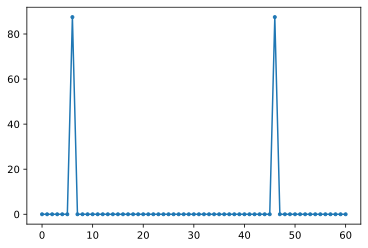

In [160]:
ar = 2
c = 25

Vread = 0.2
row = np.arange(0, 61, 1)
Vgate = 3
volts =[]

for r in row:
    volts.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=3) )

plt.plot(row, [a/0.2*1e6 for a in volts], '.-')

In [162]:
row = [1, 3]
index = []
for r in row:
    index.append(r)
    index.append(3)
print(index)

[1, 3, 3, 3]


In [312]:
ar = 2
c = 5

Vread = 0.1
Vgate = 5
data1 = a0.read_dpe_col_int(Vread, Vgate, array=ar, row=[0], col=c, gain=3)
# data1 = a0.read_dpe_col_int(Vread, Vgate, array=ar, row=[0], col=c, gain=2)/0.2*1e6
# data2 = a0.read_dpe_col_int(Vread, Vgate, array=ar, row=[46], col=c, gain=2)/0.2*1e6
# data3 = a0.read_dpe_col_int(Vread, Vgate, array=ar, row=[6, 46, 0, 2], col=c, gain=2)/0.2*1e6

print(data1)

1.67644183773216e-06


In [297]:
print(dut.data_generate_vector([0,0,0,1], [0, 0, 0, 1]))
print(dut.data_generate_sparse([0, 0]))

[0, 0, 1, 0, 32768, 0, 0, 0]
[0, 0, 1, 0, 32768, 0, 0, 0]


In [302]:
Vread = 0.1
Vgate = 5
row_vector = [0, 0, 0, 1]
volt = a0.read_dpe_int(Vread, Vgate, row_vector, array=2, gain=3, Vref=0.5)
print(volt)

[2.189638318670577e-06, 7.732160312805474e-06, 2.8054740957966762e-06, 1.0948191593352885e-06, 0.0, 1.7790811339198436e-06, 2.737047898338221e-06, 3.558162267839687e-06, 1.1752199413489736e-05, 4.516129032258065e-06, 4.379276637341154e-06, 5.20039100684262e-06, 5.131964809384164e-06, 2.189638318670577e-06, 1.3685239491691093e-07, 0.0, 0.0, 0.0, 5.901759530791789e-06, 1.531036168132942e-05, 6.089931573802542e-06, 1.366813294232649e-05, 0.0, 0.0, 0.0, 3.0107526881720425e-06, 0.0, 0.0, 3.626588465298143e-06, 4.926686217008797e-06, 5.6109481915933524e-06, 4.379276637341154e-06, 0.0, 5.884652981427175e-06, 7.834799608993157e-06, 5.474095796676442e-07, 0.0, 0.0, 1.0948191593352885e-06, 4.379276637341154e-06, 0.0, 0.0, 2.189638318670577e-06, 2.189638318670577e-06, 2.189638318670577e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8739002932551316e-06, 2.4633431085043987e-06, 3.9687194525904206e-06, 8.46774193548387e-06, 1.0948191593352885e-06, 0.0, 1.202590420332356e-05, 6.637341153470185e-06, 6.8426197458455

In [192]:
for b in range(0, 32, 2):
    print(b)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30


In [291]:
[fifo_en, channel] = dut.which_fifo([2, 63])
print(fifo_en, channel)

7 7


In [321]:
Vread = 0.2
Vgate = 5
array = 2
Gmap = np.zeros((64,64))
for r in range(64):
    print(r)
    for c in range(64):
        Gmap[r, c] = a0.read_dpe_single_int(Vread, Vgate, array=array, row=r, col=c, gain=3)/0.2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


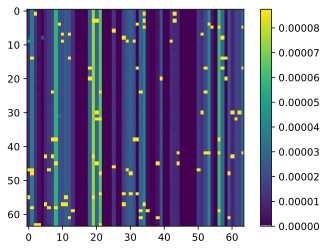

In [324]:
plt.imshow(Gmap)
plt.colorbar()

In [345]:
Vread = 0.2
Vgate =5
Gmap = np.zeros((64, 64))
for a in range(4):
    for b in range(16):
        row_vector = [0, 0, 0, 0]
        row_vector[3-a] = 0b1 << b
        Gmap[16*a+b] = a0.read_dpe_int(Vread, Vgate, row_vector, array=2, gain=3, Vref=0.5)


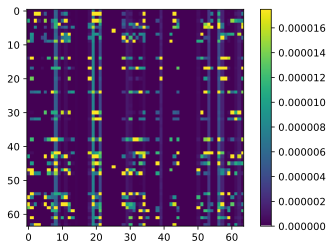

In [346]:
plt.imshow(Gmap)
plt.colorbar()

In [333]:
Vread = 0.2
Vgate = 5
array = 2
Gmap = np.zeros((64,64))
for r in range(64):
    print(r)
    for c in range(64):
        Gmap[r, c] = a0.read_single_int(Vread, Vgate, array=array, row=r, col=c, gain=3)/0.2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


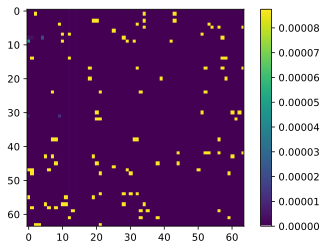

In [334]:
plt.imshow(Gmap)
plt.colorbar()